### Importa los datos


In [125]:
import pandas as pd
import numpy as np



from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes


In [126]:
import matplotlib.pyplot as plt

%matplotlib inline

In [127]:
import seaborn as sns

In [132]:
dataframe = pd.read_csv("../data/dataset_terror_clean_features.csv")
dataframe.head()

,Unnamed: 0,id,title,quantile,vote_average,duration,popularity,revenues,val_count,is_terror_comedia,Crimen,Animación,Fantasía
0,0,1011679,Shark Side of the Moon,0,5.3,88,456.059,0,3,1,0,0,0
1,1,884184,Consecration,1,6.6,90,451.660,0,1068,1,0,0,0
2,2,988165,HP La casa de la bruja de Lovecraft,3,5.8,82,406.610,0,2571,0,0,0,0
3,3,829410,Sick,1,6.3,83,358.328,0,1068,1,0,0,0
4,4,676547,Reza por el diablo,1,7.1,93,357.880,37655699,1068,1,0,0,0


In [133]:
dataframe.set_index("id")
dataframe = dataframe.iloc[:,1:]

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [134]:
X = dataframe.drop(["id",  "title", "is_terror_comedia"], axis=1)
y = dataframe['is_terror_comedia']

In [135]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el KModes

In [136]:
kmeans_per_k = [KModes(n_init=20,n_clusters=k, random_state=42, verbose=1).fit(X,categorical=y) for k in range(1,20)]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 27107.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 74, cost: 24383.0
Run 1, iteration: 2/100, moves: 0, cost: 24383.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 23213.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 391, cost: 22743.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clu

In [137]:
for km in kmeans_per_k:
    clusters = km.fit_predict(X,y)
    # Print the cluster centroids
for km in kmeans_per_k:
    print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 27107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 74, cost: 24383.0
Run 1, iteration: 2/100, moves: 0, cost: 24383.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 23213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 391, cost: 22743.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 694, cost: 22335.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 668, cost: 22242.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 650, cost: 22032.0
Run 1, iteration: 2/100, moves: 1, cos

In [138]:
# desde k = 2
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
print(silhouette_scores)

[-0.2847282160749476, -0.29209375369366775, -0.33324964510992455, -0.3328179059682764, -0.906400600828752, -0.9064330604320354, -0.9066053505681639, -0.9065783916916392, -0.9067755216135108, -0.9068413938464346, -0.9068040379567457, -0.9065413616322454, -0.9064397569253114, -0.9065129491238146, -0.9065289078470309, -0.9065490120162247, -0.9066998878070233, -0.9066968181454347]


In [139]:
labels = kmodes.predict(X,categorical = y)
silhouette_avg = silhouette_score(X, labels)

In [140]:
silhouette_scores = []
inercias = []
# Probamos varios valores de k y guardamos el coeficiente de Silhouette de cada modelo
for k in range(2, 6):
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(X, categorical=y)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)
    inercias.append(km.cost_)
    print(f'Silhouette score para k={k}: {score:.3f}')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 26725.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 218, cost: 25424.0
Run 2, iteration: 2/100, moves: 8, cost: 25424.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 216, cost: 24896.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 188, cost: 24896.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 67, cost: 24383.0
Run 5, iteration: 2/100, moves: 0, cost: 24383.0
Best run was number 5
Silhouette score para k=2: -0.285
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 355, cost: 24995.0
Run 1, iteration: 2/100, moves: 188, cost: 24995.0
Init: initi

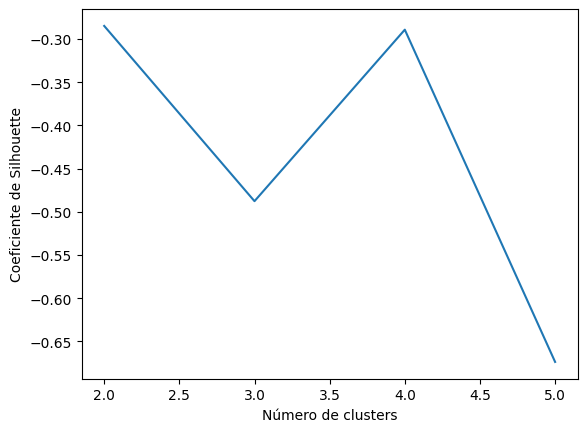

In [141]:
# k=2 parece que es el que más sentido tiene

plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

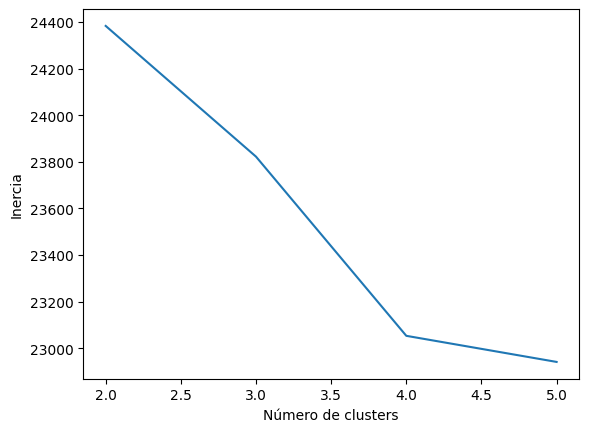

In [142]:
plt.plot(range(2, 6), inercias)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

In [143]:
print(dir(kmeans_per_k[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_enc_cluster_centroids', '_enc_map', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'cat_dissim', 'cluster_centroids_', 'cost_', 'epoch_costs_', 'fit', 'fit_predict', 'get_params', 'init', 'labels_', 'max_iter', 'n_clusters', 'n_init', 'n_iter_', 'n_jobs', 'predict', 'random_state', 'set_params', 'verbose']


En Kmodes la inercia la vemos con cost_ en lugar de con inertia_ 

Text(0, 0.5, 'Inertia')

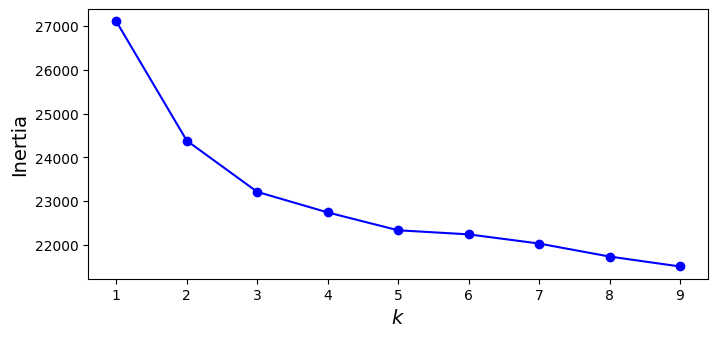

In [155]:
kmeans_per_k = [KModes(n_init=1,n_clusters=k, random_state=42).fit(X,categorical=y) for k in range(1,10)]

inertias = [model.cost_ for model in kmeans_per_k]

plt.figure(figsize=(8,3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

In [156]:
kmodes = KModes(n_clusters = 3, random_state=42).fit(dataframe, categorical=y)

#### Muestra en un grafico de quesito la distribución de los distintos clusters

In [157]:
kmodes.labels_

array([0, 1, 2, ..., 1, 0, 2], dtype=uint16)

In [158]:
kmodes.cluster_centroids_

array([['17', 'Abduction', '0', '0.0', '90', '0.84', '0', '435', '0',
        '0', '0', '0'],
       ['791', 'Dark House', '1', '5.0', '85', '0.84', '0', '1068', '1',
        '0', '0', '0'],
       ['215', 'Alone', '3', '0.0', '90', '0.84', '0', '2571', '0', '0',
        '0', '0']], dtype='<U32')

In [159]:
#from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

# Cargar los datos y dividirlos en características y etiquetas


# Crear un modelo de K-Means con el número de clusters deseado
kmodes = KModes(n_clusters=5)

# Entrenar el modelo de K-Means
kmodes.fit(X,categorical=y)

# Predecir las etiquetas de los clusters
labels = kmodes.predict(X,categorical=y)

# Calcular la puntuación del coeficiente de silueta
silhouette_avg = silhouette_score(X, labels)

# Imprimir la puntuación del coeficiente de silueta
print("La puntuación del coeficiente de silueta es:", silhouette_avg)


La puntuación del coeficiente de silueta es: -0.3328179059682764


In [160]:
X.shape

(6513, 9)

In [161]:
X_new = [[2.57100e+03, 2.97682e+02, 1.14300e+03, 6.90000e+00, 2.50000e+05, 1.38000e+02, 1.38000e+02, 1.38000e+02, 3.00000e+00]]

In [162]:
kmodes.predict(X_new)

array([0], dtype=uint16)

<AxesSubplot: ylabel='Data'>

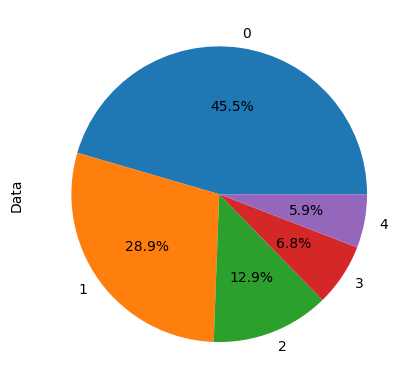

In [163]:
df = pd.DataFrame({"Data": kmodes.labels_})
df["Data"].value_counts().plot.pie(autopct="%.1f%%")
